'''
A few years ago, a discrimination lawsuit was filed against the California DDS claiming that White Non-Hispanics were receiving more funding than Hispanics. If this was true, the DDS faced some serious implications. In order to investigate the issue, several statisticians were hired to further analyze the data.


After viewing the summary, this sample of 1000 individuals seems like a good representation of the state of California as a whole. The ages look to be semi-uniformly distributed, and the ethnicity frequencies seem to accurately represent the demographic proportions in the state.


Now, we are interested in determining if there is any ethnic bias regarding the expenditures. 


'''




In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
url='https://raw.githubusercontent.com/KaonToPion/datasets/main/californiaDDSDataV2.csv'

df=pd.read_csv(url)

In [9]:
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [23]:
age_cohort=list(df['Age Cohort'].unique())
print(age_cohort)

['13 to 17', '22 to 50', '0 to 5', '18 to 21', '51+', '6 to 12']


In [24]:
sorted(age_cohort)

['0 to 5', '13 to 17', '18 to 21', '22 to 50', '51+', '6 to 12']

<AxesSubplot:xlabel='Age', ylabel='Count'>

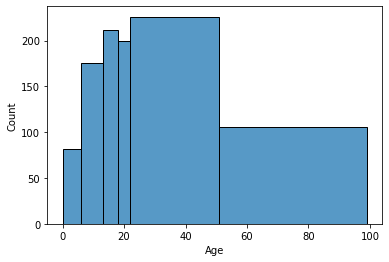

In [44]:
sns.histplot(data=df,x='Age',bins=[0,6,13,18,22,51,99])#bins es el age cohort

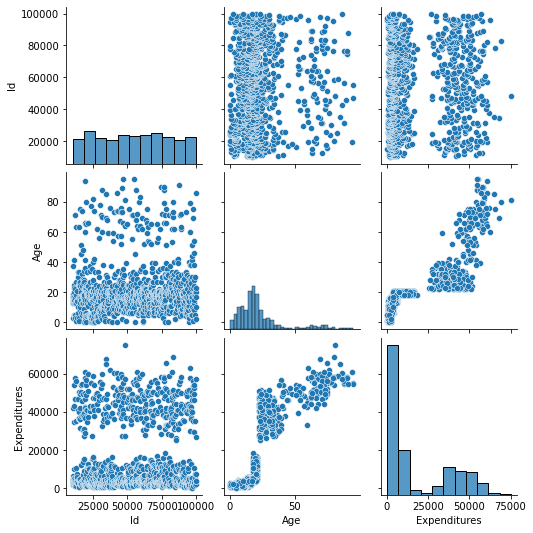

In [36]:
sns.pairplot(df)

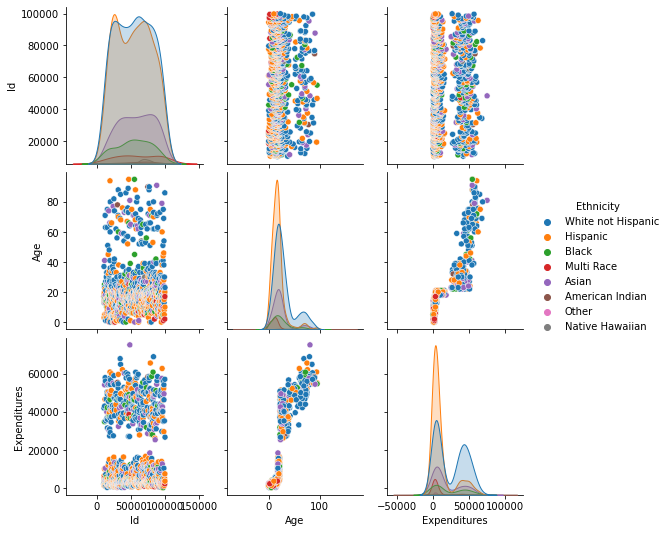

In [32]:
sns.pairplot(df,hue='Ethnicity')

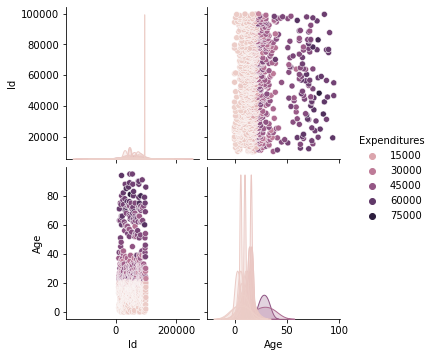

In [35]:
sns.pairplot(df,hue='Expenditures')

<AxesSubplot:xlabel='Ethnicity', ylabel='Expenditures'>

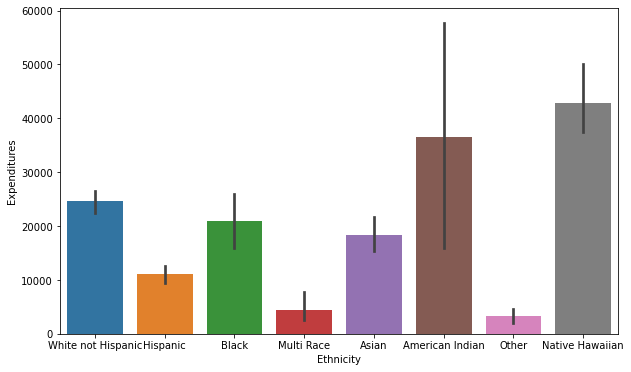

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Ethnicity',y='Expenditures',ax=ax)

In [ ]:
# a esto le quiero meter edades, cada etnia un color, y que evolucione segun la edad

<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

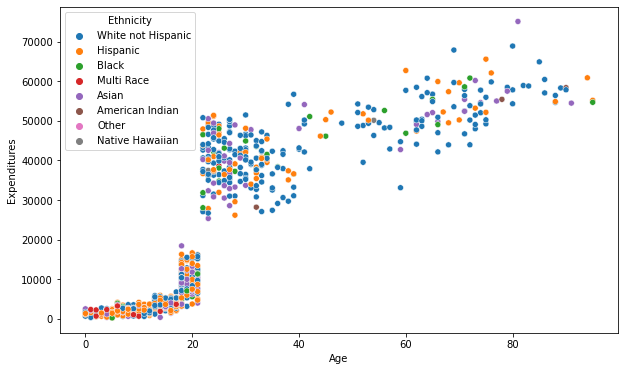

In [46]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='Expenditures',hue='Ethnicity',ax=ax)

<AxesSubplot:xlabel='Age Cohort', ylabel='Expenditures'>

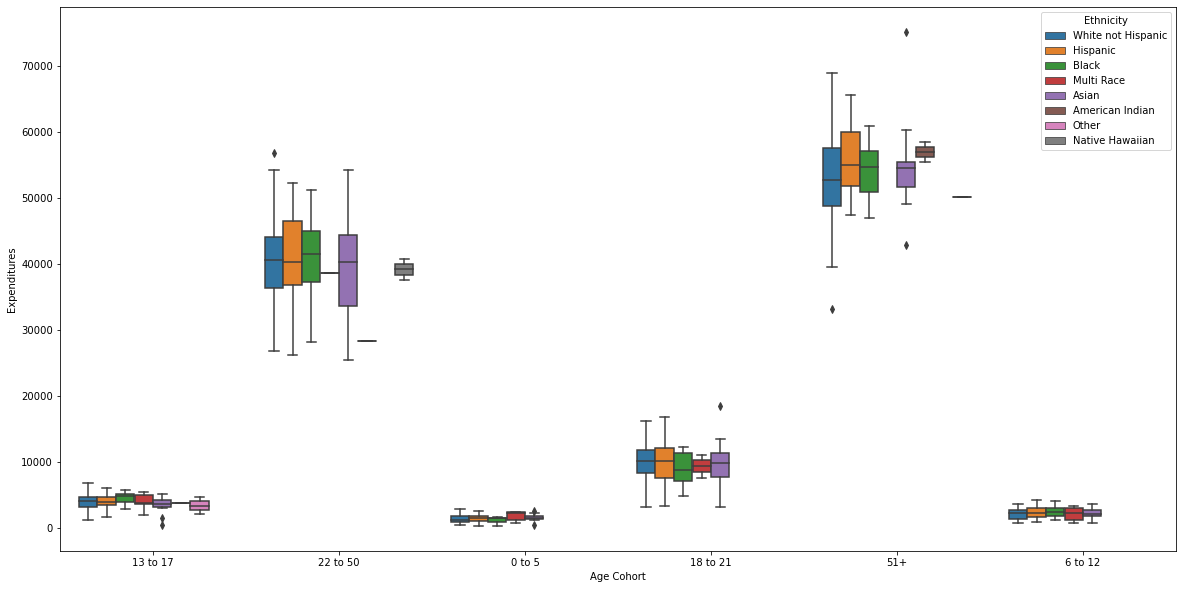

In [50]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df,x='Age Cohort',y='Expenditures',hue='Ethnicity',ax=ax)

<AxesSubplot:xlabel='Ethnicity', ylabel='Expenditures'>

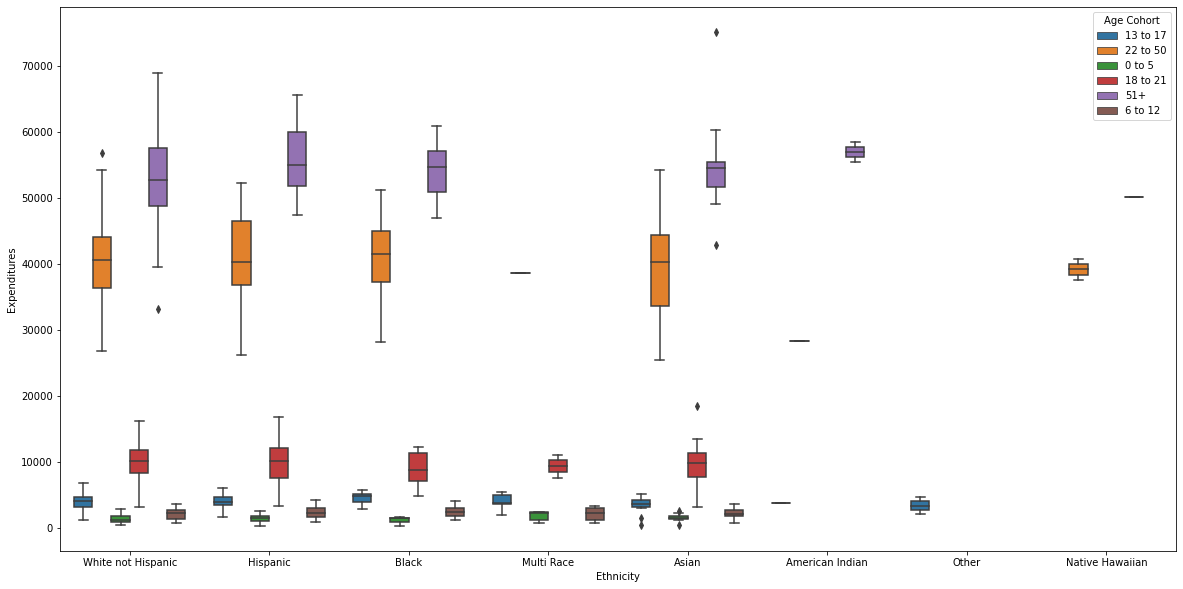

In [59]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df,x='Ethnicity',y='Expenditures',hue='Age Cohort',ax=ax)

<AxesSubplot:xlabel='Ethnicity', ylabel='Expenditures'>

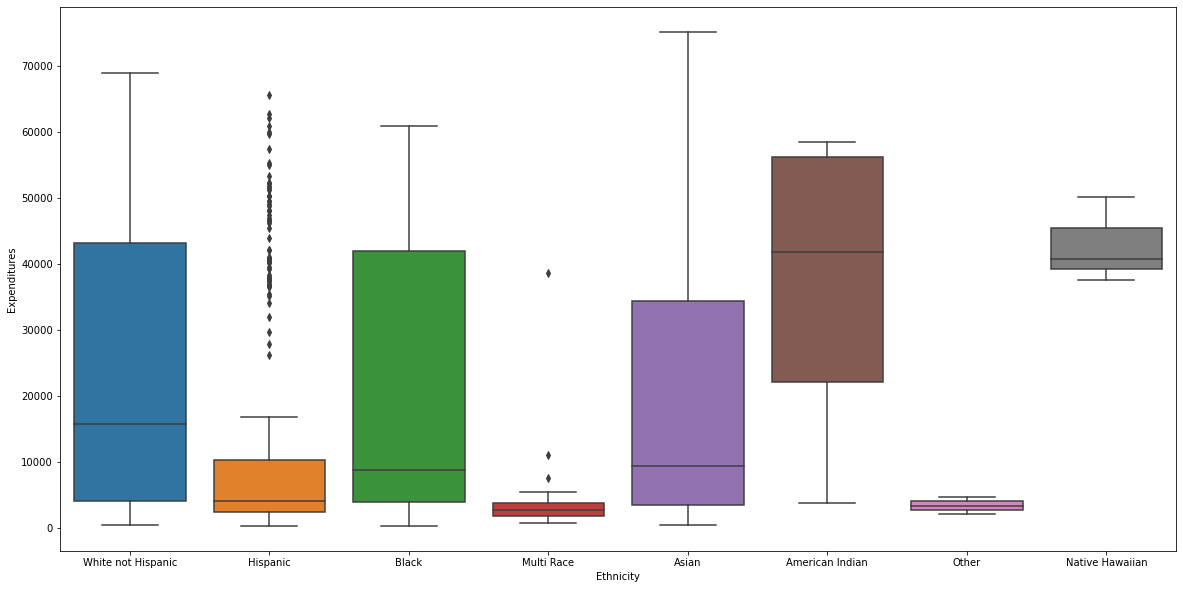

In [147]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df,x='Ethnicity',y='Expenditures',ax=ax)

In [76]:
#quienes reciben mas dinero en funcion de la cantidad de personas que hay por raza diferente
#suma de expenditures por raza

In [84]:
sum_expenditures_groupby_raza = df.groupby('Ethnicity')['Expenditures'].sum()
sum_expenditures_groupby_raza


Ethnicity
American Indian        145753
Asian                 2372616
Black                 1232191
Hispanic              4160654
Multi Race             115875
Native Hawaiian        128347
Other                    6633
White not Hispanic    9903717
Name: Expenditures, dtype: int64

In [107]:
suma_personas_por_raza = df.groupby('Ethnicity')['Id'].count()
suma_personas_por_raza

Ethnicity
American Indian         4
Asian                 129
Black                  59
Hispanic              376
Multi Race             26
Native Hawaiian         3
Other                   2
White not Hispanic    401
Name: Id, dtype: int64

In [148]:
total_personas = suma_personas_por_raza.sum()
total_personas

1000

In [151]:
sum_expenditures_groupby_raza = df.groupby('Ethnicity')['Expenditures'].sum()
sum_expenditures_groupby_raza

Ethnicity
American Indian        145753
Asian                 2372616
Black                 1232191
Hispanic              4160654
Multi Race             115875
Native Hawaiian        128347
Other                    6633
White not Hispanic    9903717
Name: Expenditures, dtype: int64

In [152]:
total_expenditures = sum_expenditures_groupby_raza.sum()
total_expenditures

18065786

In [118]:
#proporcion de expenditure recibida por proporcion de cada raza que hay

<AxesSubplot:xlabel='Ethnicity', ylabel='Expenditures'>

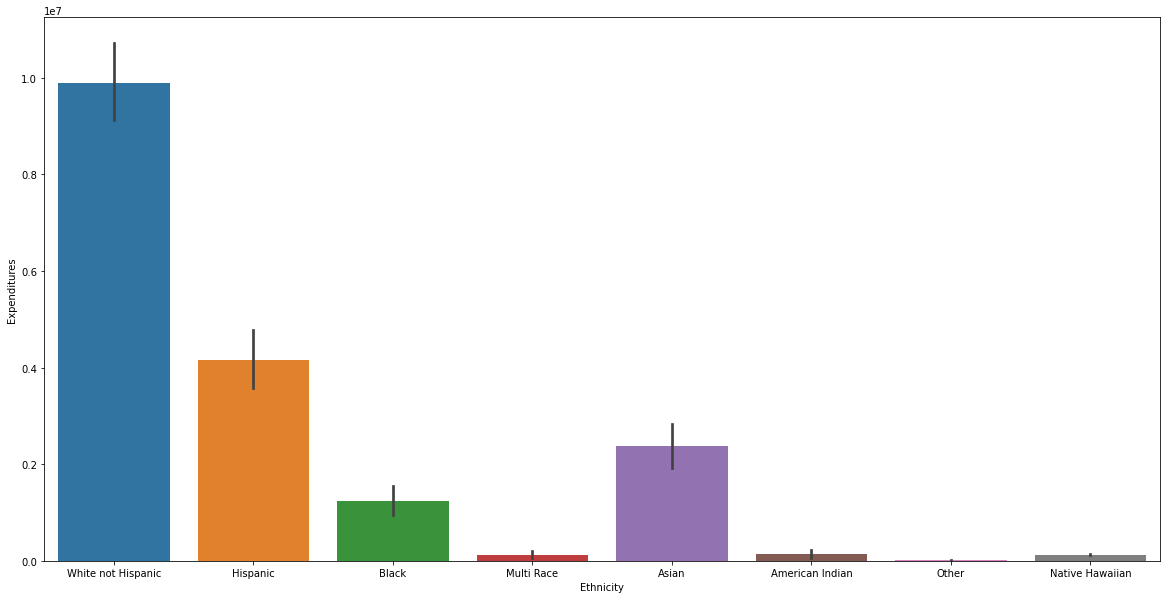

In [134]:
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='Ethnicity',y='Expenditures', estimator=np.sum,ax=ax)

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

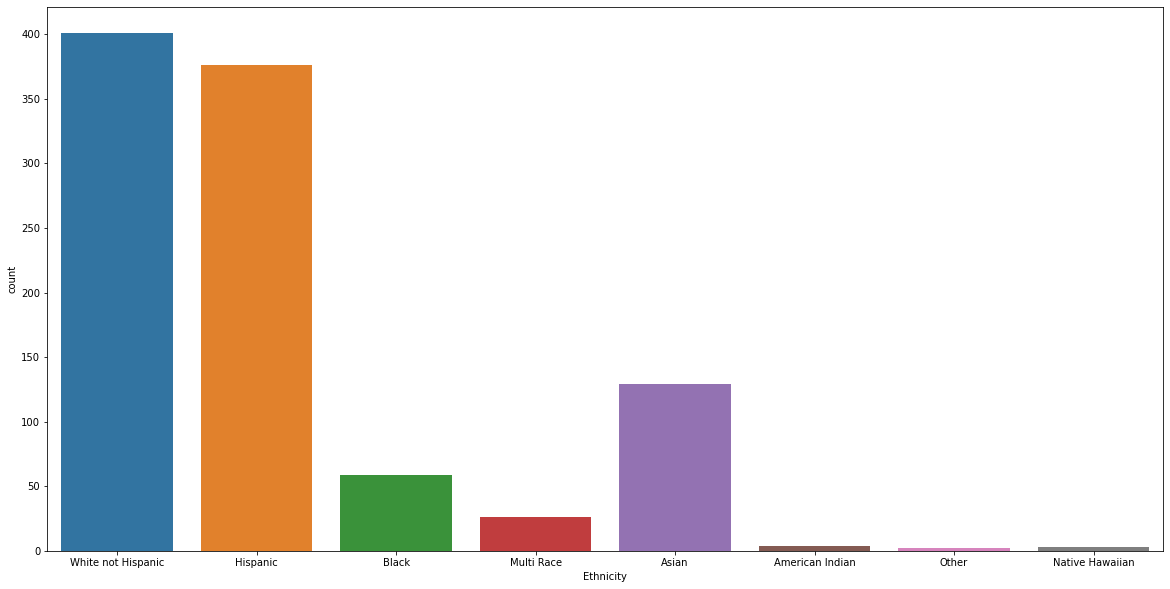

In [137]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df,x='Ethnicity',ax=ax)

In [153]:
pct_american_indian = suma_personas_por_raza['American Indian'] / total_personas
pct_asian = suma_personas_por_raza['Asian'] / total_personas
pct_black = suma_personas_por_raza['Black'] / total_personas
pct_hispanic = suma_personas_por_raza['Hispanic'] / total_personas
pct_multi_race = suma_personas_por_raza['Multi Race'] / total_personas
pct_hawaiian = suma_personas_por_raza['Native Hawaiian'] / total_personas
pct_other = suma_personas_por_raza['Other'] / total_personas
pct_white_not_hispanic = suma_personas_por_raza['White not Hispanic'] / total_personas

In [154]:
pct_american_indian_exp = suma_expenditures_por_raza['American Indian'] / total_expenditures
pct_asian_exp = suma_expenditures_por_raza['Asian'] / total_expenditures
pct_black_exp = suma_expenditures_por_raza['Black'] / total_expenditures
pct_hispanic_exp = suma_expenditures_por_raza['Hispanic'] / total_expenditures
pct_multi_race_exp = suma_expenditures_por_raza['Multi Race'] / total_expenditures
pct_hawaiian_exp = suma_expenditures_por_raza['Native Hawaiian'] / total_expenditures
pct_other_exp = suma_expenditures_por_raza['Other'] / total_expenditures
pct_white_not_hispanic_exp = suma_expenditures_por_raza['White not Hispanic'] / total_expenditures

In [155]:
suma_expenditures_por_raza / total_expenditures

Ethnicity
American Indian       2.214130e-07
Asian                 7.140569e-06
Black                 3.265842e-06
Hispanic              2.081282e-05
Multi Race            1.439185e-06
Native Hawaiian       1.660598e-07
Other                 1.107065e-07
White not Hispanic    2.219665e-05
Name: Expenditures, dtype: float64

In [156]:
(df.groupby('Ethnicity')['Expenditures'].sum() / total_expenditures).reset_index()

,Ethnicity,Expenditures
0,American Indian,0.008068
1,Asian,0.131332
2,Black,0.068206
3,Hispanic,0.230306
4,Multi Race,0.006414
5,Native Hawaiian,0.007104
6,Other,0.000367
7,White not Hispanic,0.548203


In [164]:
df2 = df.groupby('Ethnicity')['Expenditures'].agg(['sum',
                                             'count',
                                             lambda x: np.sum(x)/total_expenditures*100,#reparticion del dinero, el *100 es para el porcentaje
                                             lambda x: len(x)/total_personas*100]#reparticion de la poblacion
                                           ).reset_index()


In [167]:
df2.columns=['Ethnicity','expenditures_sum','population','exp_share','pop_share']
df2['diff'] = (df2['exp_share'] - df2['pop_share'])/df2['pop_share']
df2

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [ ]:
df2.sort_values('diff',ascending=False)

In [ ]:
#proporcion de gente por raza frente a proporcion dinero recibido por raza

In [121]:
pct_american_indian = suma_personas_por_raza['American Indian'] / total_personas
print(pct_american_indian)
pct_american_indian_exp = suma_expenditures_por_raza['American Indian'] / total_expenditures
print(pct_american_indian_exp)

0.004
2.2141300688494815e-07


In [122]:
pct_asian = suma_personas_por_raza['Asian'] / total_personas
print(pct_asian)
pct_asian_exp = suma_expenditures_por_raza['Asian'] / total_expenditures
print(pct_asian_exp)

0.129
7.140569472039578e-06


In [123]:
pct_black = suma_personas_por_raza['Black'] / total_personas
print(pct_black)
pct_black_exp = suma_expenditures_por_raza['Black'] / total_expenditures
print(pct_black_exp)

0.059
3.2658418515529855e-06


In [124]:
pct_hispanic = suma_personas_por_raza['Hispanic'] / total_personas
print(pct_hispanic)
pct_hispanic_exp = suma_expenditures_por_raza['Hispanic'] / total_expenditures
print(pct_hispanic_exp)

0.376
2.0812822647185127e-05


In [125]:
pct_multi_race = suma_personas_por_raza['Multi Race'] / total_personas
print(pct_multi_race)
pct_multi_race_exp = suma_expenditures_por_raza['Multi Race'] / total_expenditures
print(pct_multi_race_exp)

0.026
1.4391845447521631e-06


In [126]:
pct_hawaiian = suma_personas_por_raza['Native Hawaiian'] / total_personas
print(pct_multi_race)
pct_hawaiian_exp = suma_expenditures_por_raza['Native Hawaiian'] / total_expenditures
print(pct_hawaiian_exp)

0.026
1.6605975516371112e-07


In [127]:
pct_other = suma_personas_por_raza['Other'] / total_personas
print(pct_other)
pct_other_exp = suma_expenditures_por_raza['Other'] / total_expenditures
print(pct_other_exp)

0.002
1.1070650344247407e-07


In [128]:
pct_white_not_hispanic = suma_personas_por_raza['White not Hispanic'] / total_personas
print(pct_white_not_hispanic)
pct_white_not_hispanic_exp = suma_expenditures_por_raza['White not Hispanic'] / total_expenditures
print(pct_white_not_hispanic_exp)

0.401
2.2196653940216053e-05
